In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")
engine

Engine(sqlite:///../Resources/hawaii.sqlite)

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date).first()[0]
most_recent_date

'2010-01-01'

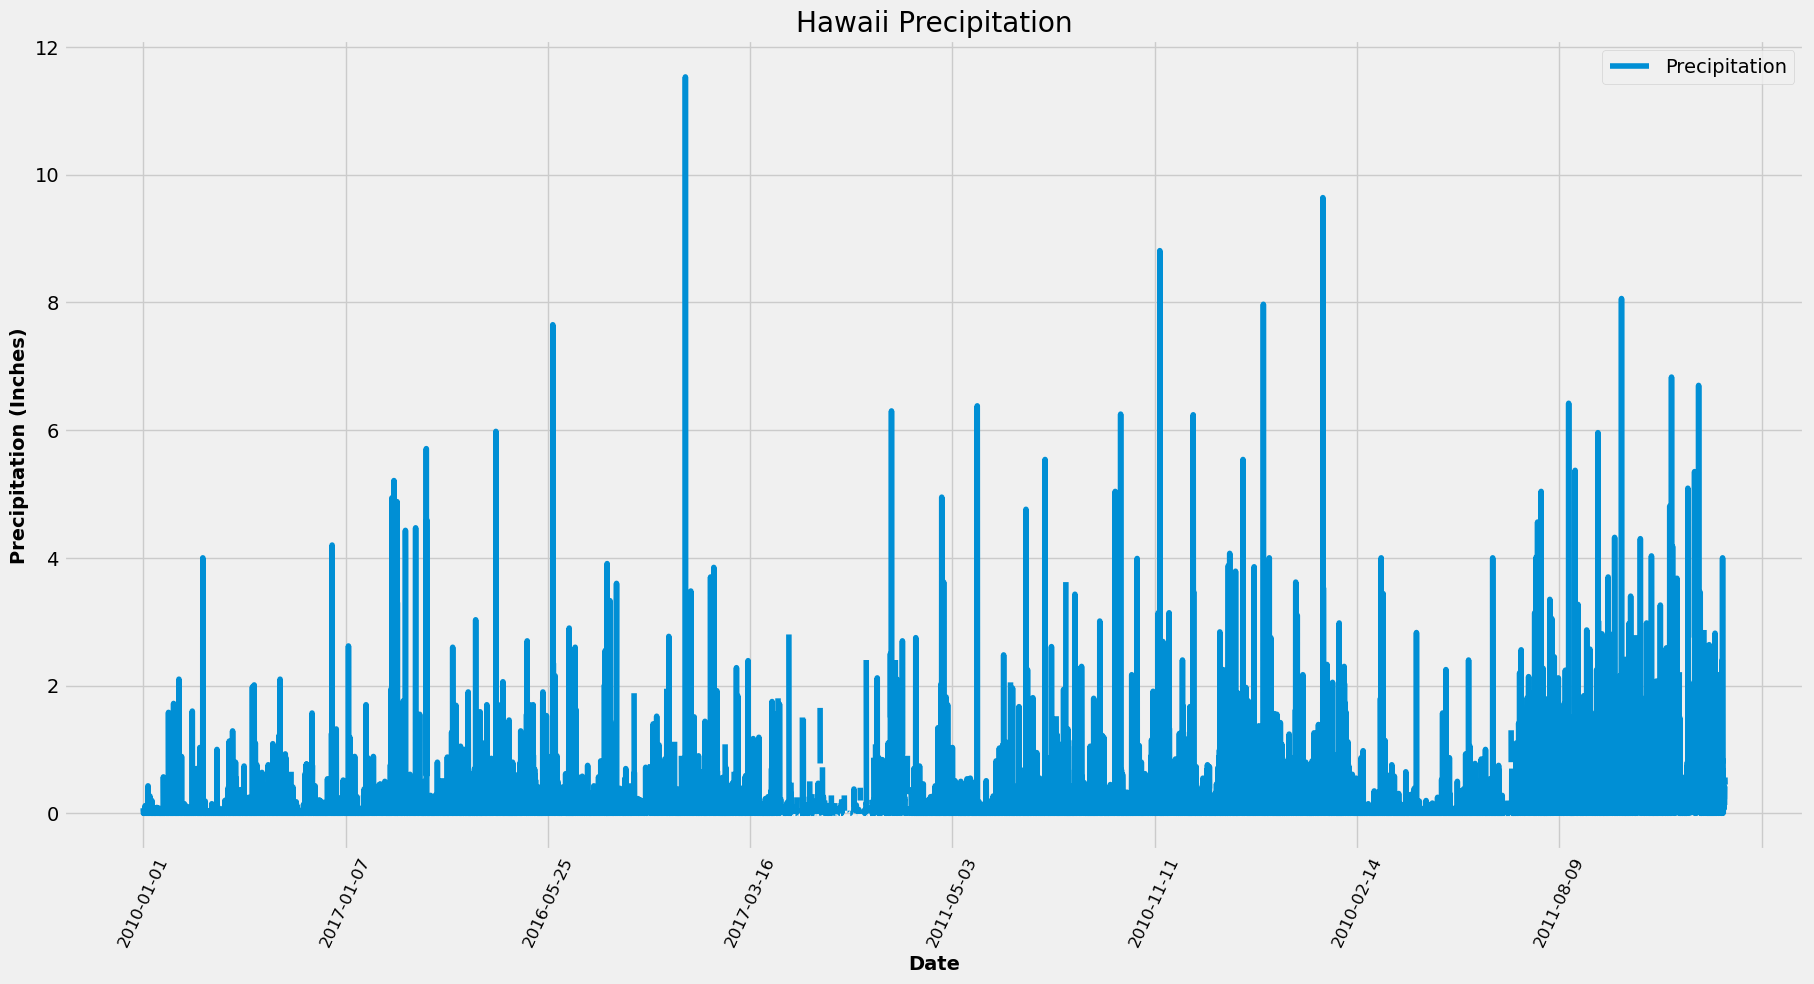

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
previous_year = dt.date(2010,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= previous_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns = ['Date', 'Precipitation'])

# Sort the dataframe by date
df.sort_index(axis=1)
df.head(20)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot('Date', 'Precipitation', figsize=(20,10))
plt.xlabel("Date", fontweight="bold")
plt.xticks(rotation=65,fontsize=12)
plt.ylabel("Precipitation (Inches)", fontweight="bold" )
plt.title("Hawaii Precipitation")

plt.savefig("./precipitation_by_date.png")
plt.show()

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station).count()
print(f'There are {total_stations} stations in this dataset')

There are 9 stations in this dataset


In [24]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [49]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = 'USC00519281'

lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active_station_id).all()
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active_station_id).all()
average_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station_id).all()

print(f'The lowest temperature for station {most_active_station_id} is {lowest_temp}')
print(f'The highest temperature for station {most_active_station_id} is {highest_temp}')
print(f'The average temperature for station {most_active_station_id} is {average_temp}')


The lowest temperature for station USC00519281 is [(54.0,)]
The highest temperature for station USC00519281 is [(85.0,)]
The average temperature for station USC00519281 is [(71.66378066378067,)]


<Axes: ylabel='Frequency'>

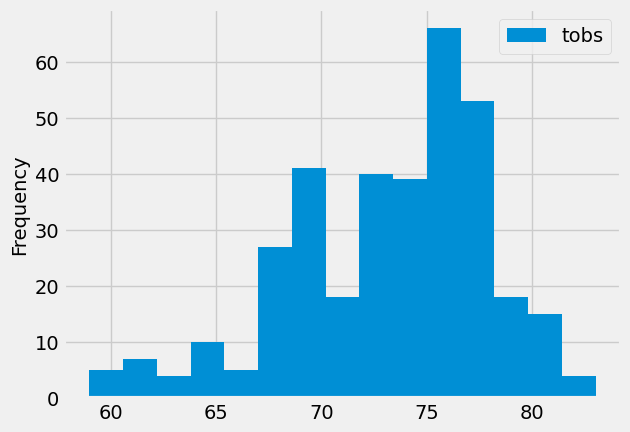

In [63]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

previous_year = dt.date(2017,8,23) - dt.timedelta(days=365)

last_year_obs_results = session.query(Measurement.date, Measurement.tobs).\
                                      filter(Measurement.date >= previous_year,\
                                      Measurement.station == most_active_station_id).all()

results_df = pd.DataFrame(last_year_obs_results)
results_df.plot.hist(bins=15)

# Close Session

In [ ]:
# Close Session
session.close()